# Sentiment Analysis of Twitter Data

In [1]:
# Import important lib used.

import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections
from textblob import TextBlob, Word

In [2]:
# load your data and convert the tweet column to a list. so we have a list of tweets
data = pd.read_csv("Documents/dsnbootcamp.csv")
tweet_text = list(data["Tweet Text"])

# making a copy, so we so we don't change the main tweet_text column
text = tweet_text.copy()

In [3]:
# taking the sentiment of the tweets.
senti = [list(TextBlob(tweet).sentiment) for tweet in text]
polarity = [sent[0] for sent in senti]
subjectivity = [sent[1] for sent in senti]

# Appending it to the data dataframe
data["polarity"] = polarity
data["subjectivity"] = subjectivity

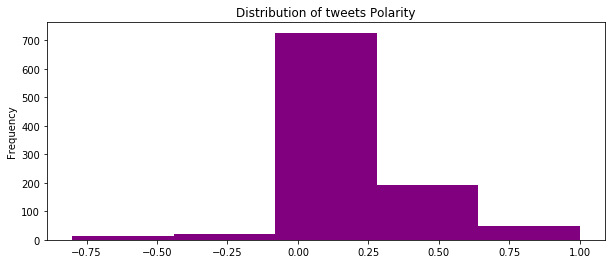

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
data["polarity"].plot.hist(bins=5, x='words', y='count', ax=ax, color="purple")
ax.set_title("Distribution of tweets Polarity")
plt.savefig('DSN Bootcamp polarity.png', dpi=300, bbox_inches='tight')

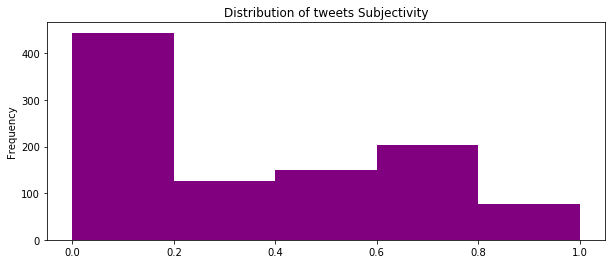

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
data["subjectivity"].plot.hist(bins=5, ax=ax, color="purple")
ax.set_title("Distribution of tweets Subjectivity")
plt.savefig('DSN Bootcamp subjectivity.png', dpi=300, bbox_inches='tight')

In [6]:
# this shows us the top tweets i.e tweets that occoured the most
all_words_no_urls = list(itertools.chain(text))
counts_no_urls = collections.Counter(all_words_no_urls)

#print out the top 5 tweets that occuoured the most
counts_no_urls.most_common(5)

[('RT @risin_developer: And I got two awards from the @DataScienceNIG 2019 Artificial Intelligence Bootcamp.  🤗🤗🤗\n\n🏆 Best Poster award from RE…',
  75),
 ('RT @DataScienceNIG: Over 240 students equiped with relevant industry experience, expert-level technical skills in Artificial Intelligence &amp;…',
  66),
 ('RT @Nasereliver: Alihamdulahi 🙏🙏\nI came 1st position out of 162 data Geek @DataScienceNIG #AIBootcamp 2019 24 hours @AXAMansard Insurance D…',
  58),
 ('RT @DataScienceNIG: Award to Sarah Adigwe @iamm_SONA as the MainOne  @Mainoneservice @DataScienceNIG #AIBootcamp best female Data Scientist…',
  28),
 ('RT @DataScienceNIG: Participants digging it out with the  @AXA "Insurance Prediction" Hackathon Challenge.\n\nWith recognition awards, Gifts,…',
  28)]

# Test Analysis

Apart from taking Sentiment, performing text analysis would be a good way of identifying what ours data is really talking about. Text analysis could help us know what words or phrases occoured most frequenyly.

In [7]:
# import necessary libraries
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams
from wordcloud import WordCloud, STOPWORDS

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
def remove_RT(list_of_tweets):
    for index, tweet in enumerate(list_of_tweets): #removes the "RT"  that occoured frequently in the begining of some tweets
        list_of_tweets[index] =  re.sub("RT","",tweet)
        
def remove_amp(list_of_tweets):
    for index, tweet in enumerate(list_of_tweets): #removes the "&amp" that occoured frequently within some tweets
        list_of_tweets[index] =  re.sub("amp;","",tweet)

def remove_mentions(list_of_tweets): #removes all @ mentions (usernames) from each tweet
    for index, tweet in enumerate(list_of_tweets):
        list_of_tweets[index] =  re.sub("@[\w]*","",tweet)

def remove_hastags(list_of_tweets):
    for index, tweet in enumerate(list_of_tweets):
        list_of_tweets[index] =  re.sub("#[\w]*","",tweet)

def remove_links(list_of_tweets):
    for index, tweet in enumerate(list_of_tweets):
        list_of_tweets[index] = re.sub("https://t\.co/[\w]+","",tweet)

def remove_puntuations(list_of_tweets):
    for index, tweet in enumerate(list_of_tweets):
        list_of_tweets[index] =  re.sub("[:;,.?&]","",tweet)

def remove_emoticons_and_ellipsis(list_of_tweets):
    for index, tweet in enumerate(list_of_tweets):
        list_of_tweets[index] = tweet.encode("ascii", "ignore").decode("ascii")
        
def remove_numbers(list_of_tweets):
    for index, tweet in enumerate(list_of_tweets):
        list_of_tweets[index] =  re.sub("[\d]","",tweet)
        
def tokenise_tweet(list_of_tweets):
    for index, tweet in enumerate(list_of_tweets):
        list_of_tweets[index] = word_tokenize(tweet.lower())

#  This function iterates through a list of list of tweets then  rempve stopwords, and append to a new list wordsfiltered
#     Although not useful in this project, it took me a while to write it, amd i couldnt delete it *smile*

# def remove_stopwords(list_of_tokenised_tweets):
#     stop = stopwords.words('english')
#     wordsfiltered = []
#     list_of_wordsfiltered = []
    
#     for listed_tweets in list_of_tokenised_tweets:
#         for tweet_word in listed_tweets:
#             if tweet_word not in stop:   
#                 list_of_wordsfiltered.append(tweet_word) 
#         wordsfiltered.append(list_of_wordsfiltered)
#         list_of_wordsfiltered = []
#         list_of_tokenised_tweets = list_of_wordsfiltered
#     return wordsfiltered

In [9]:
remove_RT(text)
remove_amp(text)
remove_mentions(text)
remove_hastags(text)
remove_links(text)
remove_numbers(text)
remove_puntuations(text)
remove_emoticons_and_ellipsis(text)
tokenise_tweet(text)

# test is now a list of list of word tokenized tweets. below are the first two tweets 
""" [  ['thanks','for','a','great','experience','the','it','was','great','i','leant','a','whole','lot','got','more','than','e'],
       ['i','had','the','opportunity','to','give','my','first','poster','presentation','on','malaria','detection', "..."]   
    ]
"""

' [  [\'thanks\',\'for\',\'a\',\'great\',\'experience\',\'the\',\'it\',\'was\',\'great\',\'i\',\'leant\',\'a\',\'whole\',\'lot\',\'got\',\'more\',\'than\',\'e\'],\n       [\'i\',\'had\',\'the\',\'opportunity\',\'to\',\'give\',\'my\',\'first\',\'poster\',\'presentation\',\'on\',\'malaria\',\'detection\', "..."]   \n    ]\n'

In [10]:
new_text = [j for i in text for j in i] #converts list of list of  word tokenized tweet in to a single list of word tokenized tweet

# remove stopwords from tweets
stop = stopwords.words('english') 
tweets_no_stop = []
for tweet_word in new_text:
    if tweet_word not in stop:   
          tweets_no_stop.append(tweet_word)
        

[('data', 267), ('learning', 199), ('artificial', 155), ('intelligence', 155), ('poster', 149), ('machine', 147), ('award', 123), ('best', 117), ('bootcamp', 112), ('awards', 106), ('building', 96), ('insurance', 94), ('participants', 94), ('experience', 87), ('industry', 82), ('got', 81), ('``', 81), ('position', 80), ('two', 77), ('equiped', 70), ('nigeria', 68)]


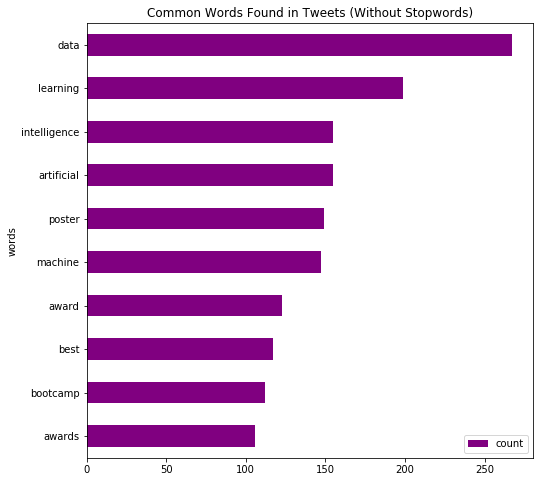

In [11]:
# word count of tweets
all_words_no_urls = itertools.chain(tweets_no_stop)
counts_no_urls = collections.Counter(all_words_no_urls)
print(counts_no_urls.most_common(21))

# convert to a dataframe so it could be plotted
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(10),columns=['words', 'count'])

## Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Common Words Found in Tweets (Without Stopwords)")
plt.savefig('DSN Bootcamp Wordcount.png', dpi=300, bbox_inches='tight')

[(('artificial', 'intelligence'), 154), (('machine', 'learning'), 133), (('intelligence', 'bootcamp'), 84), (('got', 'two'), 76), (('two', 'awards'), 76), (('awards', 'artificial'), 76), (('bootcamp', 'best'), 76), (('best', 'poster'), 76), (('poster', 'award'), 76), (('students', 'equiped'), 67)]


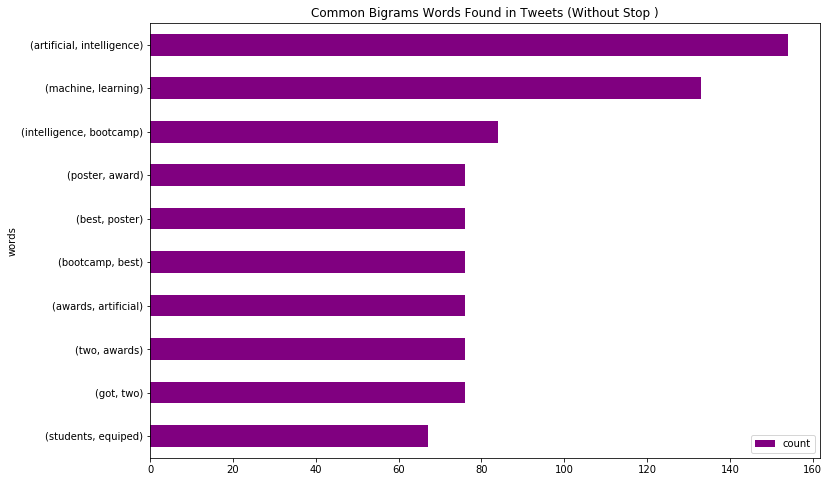

In [12]:
# bigrams count of tweets
terms_bigram = list(bigrams(tweets_no_stop))
bigramss = itertools.chain(terms_bigram)
bigram_counts = collections.Counter(bigramss)
print(bigram_counts.most_common(10))

# convert to a dataframe so it could be plotted
bigrams_tweets_no_urls = pd.DataFrame(bigram_counts.most_common(10),columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(12, 8))
## Plot horizontal bar graph
bigrams_tweets_no_urls.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Common Bigrams Words Found in Tweets (Without Stop )")
plt.savefig('DSN Bootcamp Bigrams.png', dpi=300, bbox_inches='tight')

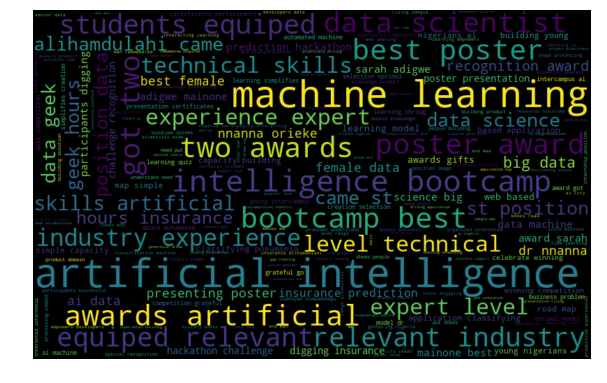

In [13]:
words = itertools.chain(tweets_no_stop)
all_words = " ".join(review for review in words)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
print(wordcloud)
plt.figure(figsize=(10, 7))
ax.set_title("Word Cloud")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
wordcloud.to_file("DSN Bootcamp wordcloud.jpg")


In [17]:
$ pip freeze

SyntaxError: invalid syntax (<ipython-input-17-524ec85f8139>, line 1)